In [66]:
# Name : Parshva Shah
# CWID : 20027093
# Assignment/lab - 9 - HW09.1_Cluster
# hclust

In [67]:
# Import Required Libraries
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

In [68]:
# Load the dataset
df = pd.read_csv("wisc_bc_ContinuousVar.csv")

In [69]:
# Remove rows with missing values as mentioned in the problem
df.dropna(inplace=True)

In [70]:
# load target variable 
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [71]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [72]:
# Using Hierarchical clustering using Agglomerative Methods (hclust)
hclust = AgglomerativeClustering(n_clusters=2)
hclust_labels = hclust.fit_predict(X_scaled)

In [73]:
# Add cluster labels to be able to tabulate later
df['hclust'] = hclust_labels

In [74]:
# Tabulate the clustered rows against the "diagnosis" column
hclust_tabulated = pd.crosstab(df['diagnosis'], df['hclust'])

print(" Tabulated Clustering against diagnosis (hclust):\n", hclust_tabulated)

 Tabulated Clustering against diagnosis (hclust):
 hclust       0    1
diagnosis          
B           24  333
M          170   42


In [75]:
# for dendrograms
# Calculate the linkage matrix
linkage_matrix = hierarchy.linkage(X_scaled, method='ward')

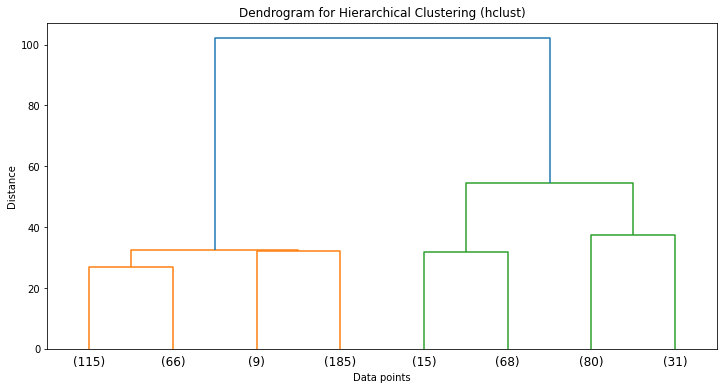

In [76]:
# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = hierarchy.dendrogram(linkage_matrix, p=2, truncate_mode='level', labels=hclust_labels)
plt.title('Dendrogram for Hierarchical Clustering (hclust)'.format(2))
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()